## A) Import libs 

In [1]:
#import libs
import numpy as np 
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt 
import math
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import ipywidgets as widgets
from ipywidgets import interact

# import files 
from DataSet import DataSet
from DataGen import DataGen 
from FixedGP import FixedGP 
from DataGen import DataGen
from utilities import standardize_vector, map_plot, labeled_inputs_plot, compare_output_label, plot_combinations

## B) Load matlab data with DataSet class

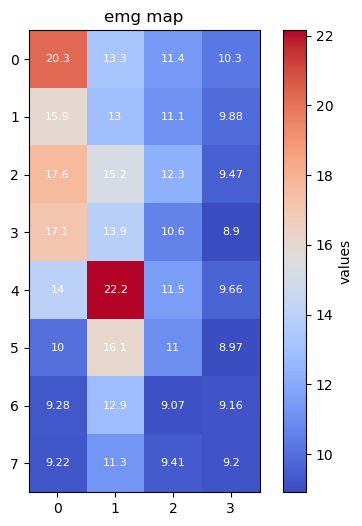

In [2]:
# Load dataset and extract relevant data
ds = DataSet('data/', 'rat', 'rat2_M1_190617.mat', 'rat2')  # Initialize the dataset with the path, animal type, file, and dataset name
ds.load_matlab_data()  # Load the data from the specified MATLAB file

# Extract relevant variables from the dataset
ch2xy = ds.set['ch2xy']  # Channel to (x, y) position mapping
sorted_respMean = ds.set['sorted_respMean']  # Sorted response means
output = sorted_respMean[:, 4]  # Select the 5th column of the sorted response means, i.e. the responses of the 5th emg 

# Initialize an empty map for EMG values, with shape based on the maximum x and y positions
map_emg = np.full((np.max(ch2xy[:, 0]), np.max(ch2xy[:, 1])), np.nan)

# Loop over each channel and assign its response mean value to the corresponding position in the EMG map
for i in range(ch2xy.shape[0]):
    # Convert the (x, y) position to zero-based indices and set the EMG value at that position
    map_emg[int(ch2xy[i, 0] - 1), int(ch2xy[i, 1] - 1)] = output[i]

# Plot the generated EMG map using the previously defined map_plot function
map_plot(map_emg, 'emg map')

## C) Generate data for the NN with DataGen class

In [3]:
name = 'test_5que_10kcomb'

In [4]:
dg = DataGen(map_emg)
dg.generate_pre_labeled_inputs(name=name, nb_queries=5, nb_comb=10000, 
                               kernel_type='Mat52', noise_std=0.1, 
                               output_std=3, lengthscale=[1.*1/7, 1.*1/3])
dg.format_labeled_inputs(name=name)

These pre-labeled inputs were made with these parameters:
 name: test_5que_10kcomb
 nb_queries: 5
 nb_comb: 10000
 kernel_type: Mat52
 noise_std: 0.1
 output_std: 3
 lengthscale: [0.14285714285714285, 0.3333333333333333]
